In [1]:
import os
from os import path as osp

import matplotlib.pyplot as plt
import pandas as pd
import yaml

In [2]:
repo_dir = '/Users/yairschiff/Development/TNP-pytorch/'

In [3]:
exp_category = 'regression'
exp = 'gp'
results_dir = osp.join(repo_dir, exp_category, 'results', exp)
models = ['anp', 'tnpd']

In [4]:
# Read hyperparams and results
args_file = 'args.yaml'
eval_file = 'eval_all.log'
exp_list = []
for m in models:
    for v in os.listdir(osp.join(results_dir, m)):
        # Parse args yaml:
        with open(osp.join(results_dir, m, v, args_file), 'r') as af:
            try:
                exp_dict = yaml.safe_load(af)
            except yaml.YAMLError as exc:
                print(exc)
        # Parse eval
        eval_dict = {}
        try:
            with open(osp.join(results_dir, m, v, eval_file), 'r') as ef:
                for line in ef.readlines():
                    line_split = line.split()
                    eval_dict[line_split[1]] = line_split[line_split.index('tar_ll')+1]
            exp_dict.update(eval_dict)
        except FileNotFoundError as fe:
            print(fe)
            continue
        exp_list.append(exp_dict)
exp_df = pd.DataFrame(sorted(exp_list, key=lambda x: f'{x["model"]}-{x["expid"]}'))

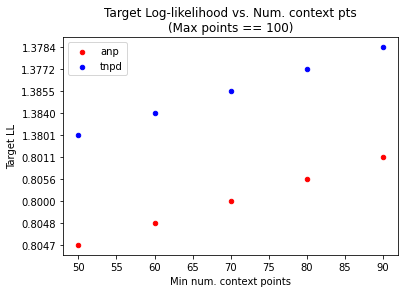

In [6]:
filt = 'exp_df[\'max_num_points\'] == 100'
fig, ax = plt.subplots()
colors = ['r', 'b', 'g', 'orange']
for i, (label, model) in enumerate(exp_df.loc[eval(filt)].groupby('model')):
#     display(model.head())
    model.plot(ax=ax, kind='scatter', x='min_num_ctx', y='rbf', label=label, color=colors[i])
# plt.plot(exp_df.loc[eval(filt)]['min_num_ctx'], exp_df.loc[eval(filt)]['rbf'], marker='o')
plt.xlabel('Min num. context points')
plt.ylabel('Target LL')
plt.title('Target Log-likelihood vs. Num. context pts\n(Max points == 100)')
plt.legend(loc='best')
plt.show()